# Clinic vs serology time comparison 

This notebook aims to compare the temporal trends between aggregate data from clinical cases and serological datafrom pregnant women.

Main goals:

- Quantify the consistency of the temporal evolution of malaria incidence or seropositivity between the two data sources 

- Compare the temporal changes detected from the two sources of data

#### Importing packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import scipy.stats as sci_stats
from genomic_tools import utils, stats
from stat_tools import estimations
from pregmal_pytools import temporal_utils, notebook_pytools
from time import time

#### Importing data 

In [2]:
save_path = 'data/'

In [3]:
mipmon, rrs, opd, opd_5, opd_2to9, total_rrs, total_opd, \
total_opd_5, total_opd_2to9, antigens = temporal_utils.import_temporal_data(opd_5_name = 'weekly_OPD_cases_2016_2019_age_5.csv')

/home/isglobal.lan/apujol/anaconda3/envs/py38/lib/python3.8/site-packages/pregmal_pytools-1.0-py3.8.egg/pregmal_pytools/temporal_utils.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/home/isglobal.lan/apujol/anaconda3/envs/py38/lib/python3.8/site-packages/pregmal_pytools-1.0-py3.8.egg/pregmal_pytools/temporal_utils.py:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/home/isglobal.lan/apujol/anaconda3/envs/py38/lib/python3.8/site-packages/pregmal_pytools-1.0-py3.8.egg/pregmal_pytools/temporal_utils.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future ve

### Define masks 

In [4]:
#Define masks for MiPMon data
mipmon_pn = mipmon['visit'] == 'PN'
mipmon_pg = mipmon_pn&(mipmon['gestnum'] == 1)
mipmon_sg = mipmon_pn&(mipmon['gestnum'] == 2)
mipmon_12g = mipmon_pn&(mipmon['gestnum'] <= 2)
mipmon_mg = mipmon_pn&(mipmon['gestnum'] > 1)
mipmon_3g = mipmon_pn&(mipmon['gestnum'] > 2)
mipmon_hiv_pos = mipmon_pn&(mipmon['hiv'] == 'HIV+')
mipmon_hiv_neg = mipmon_pn&(mipmon['hiv'] == 'HIV-')
mipmon_pg_hiv_pos = mipmon_pg&mipmon_hiv_pos
mipmon_pg_hiv_neg = mipmon_pg&mipmon_hiv_neg
mipmon_pg_pos = mipmon_pg&(mipmon['pcrpos'] == 1)
mipmon_pg_neg = mipmon_pg&(mipmon['pcrpos'] == 0)
mipmon_sg_pos = mipmon_sg&(mipmon['pcrpos'] == 1)
mipmon_sg_neg = mipmon_sg&(mipmon['pcrpos'] == 0)
mipmon_12g_pos = mipmon_12g&(mipmon['pcrpos'] == 1)
mipmon_12g_neg = mipmon_12g&(mipmon['pcrpos'] == 0)
mipmon_mg_pos = mipmon_mg&(mipmon['pcrpos'] == 1)
mipmon_mg_neg = mipmon_mg&(mipmon['pcrpos'] == 0)
mipmon_3g_pos = mipmon_3g&(mipmon['pcrpos'] == 1)
mipmon_3g_neg = mipmon_3g&(mipmon['pcrpos'] == 0)


mipmon_selection = {
    'All prenatal' : mipmon_pn,
    'Primigravid' : mipmon_pg,
    'Multigravid' : mipmon_mg,
    'HIV+' : mipmon_hiv_pos,
    'HIV-' : mipmon_hiv_neg,
    'Primigravid HIV-' : mipmon_pg_hiv_neg,
}

### Parameters 

In [5]:
colors = [cm.turbo((i+1)/float(len(mipmon_selection) + 1)) for i in range(len(mipmon_selection) + 1)]

In [6]:
#Regions to compare
all_mipmon_areas = [['Magude-sede'], ['Ilha-Josina'], ['Manhica-Sede']]
all_clinic_areas = [['cs_magude', 'cs_facazissa'], ['Ilha Josina'], ['Manhiça']]


### Time shift minimisations 

cases All prenatal


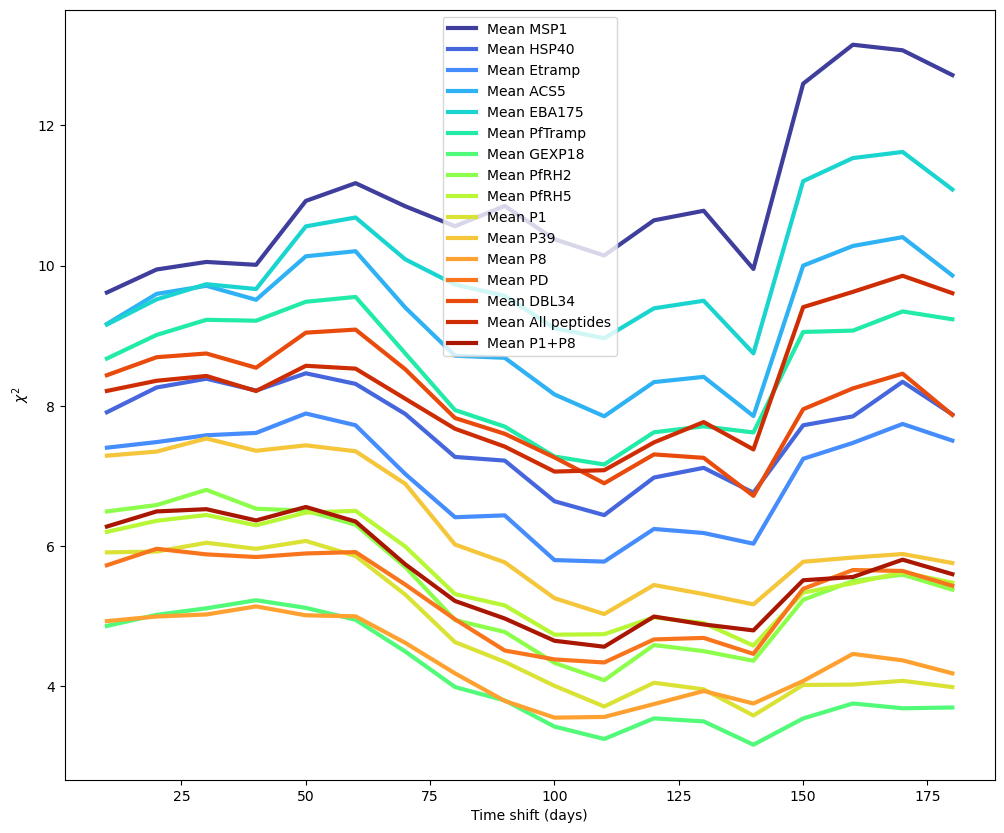

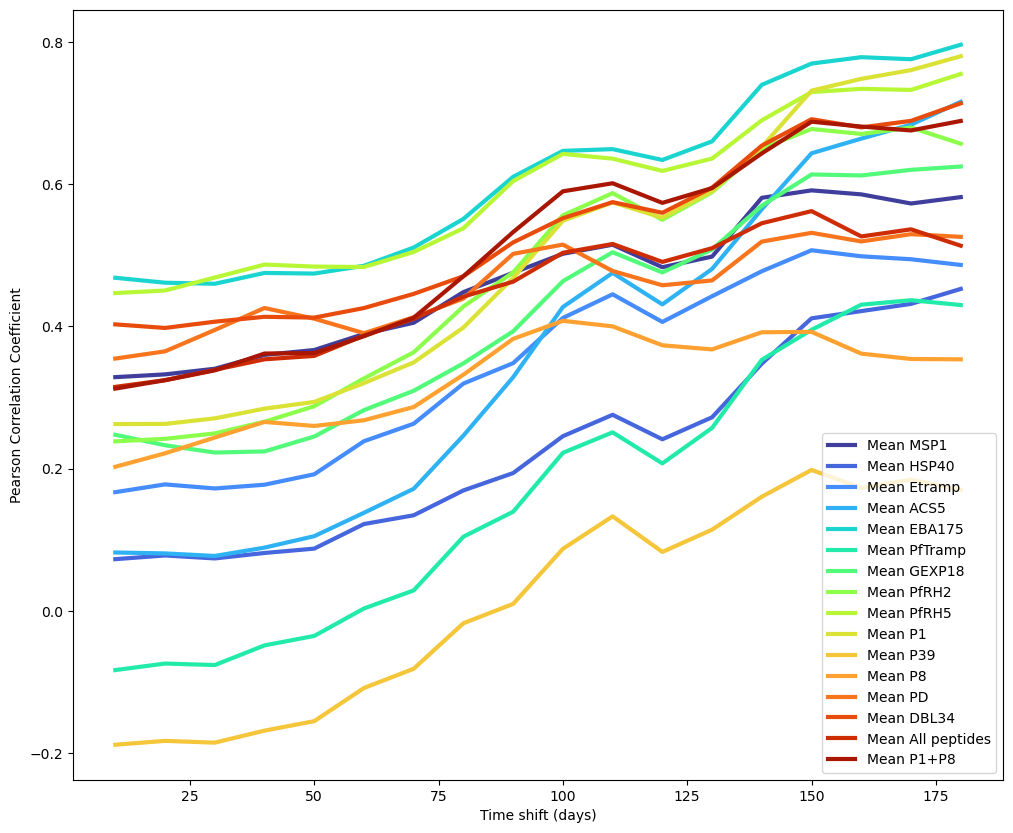

cases Primigravid


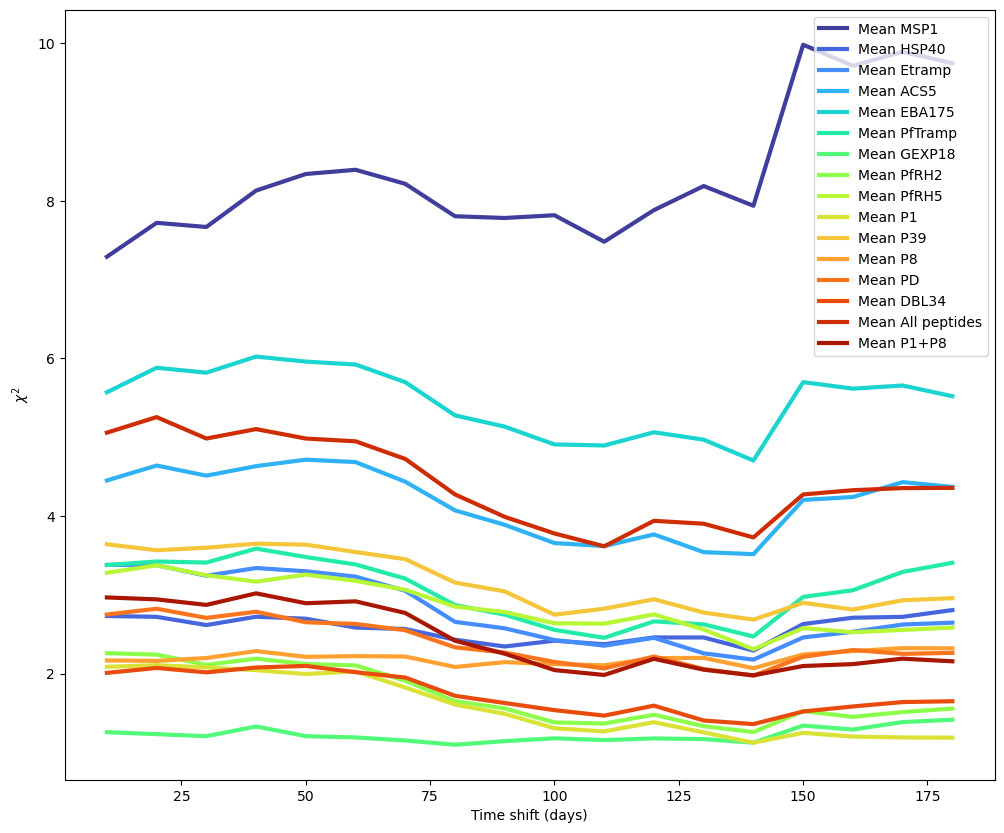

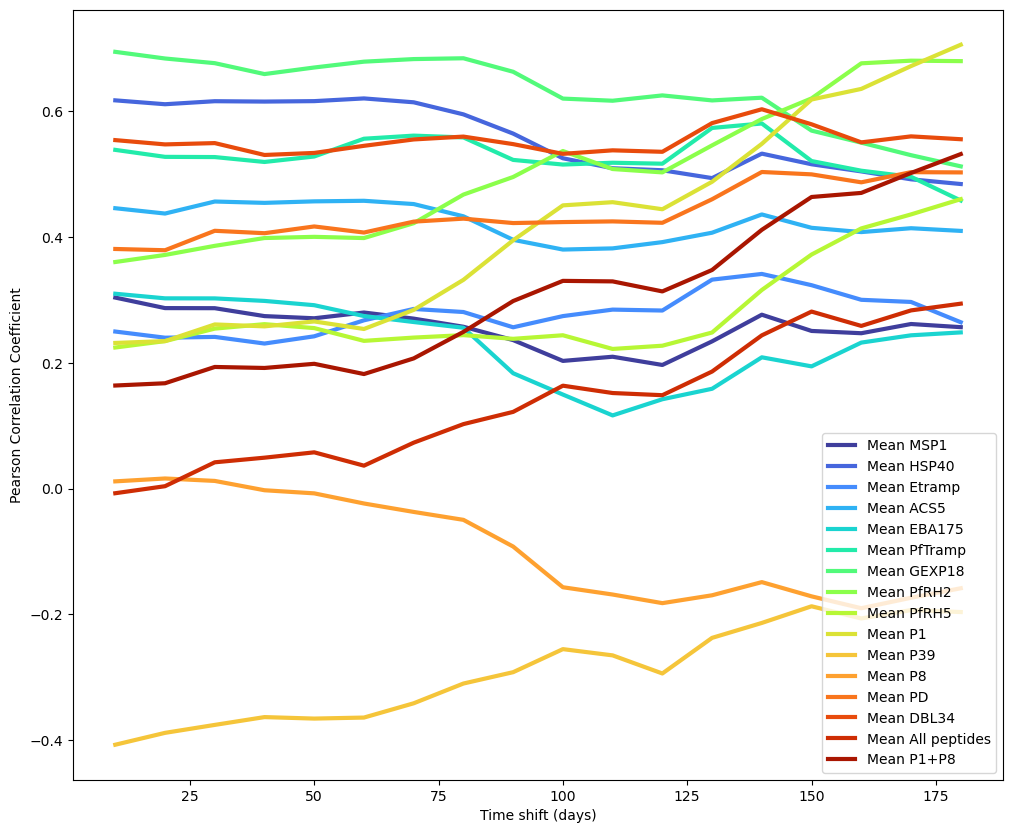

cases Multigravid


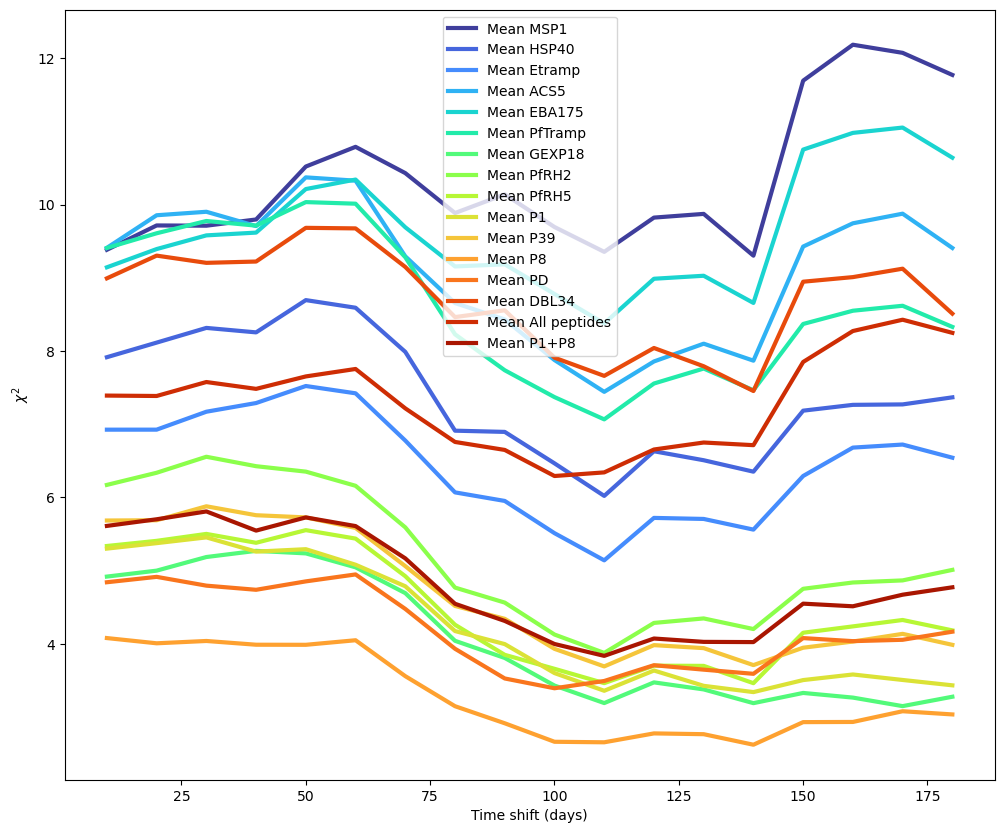

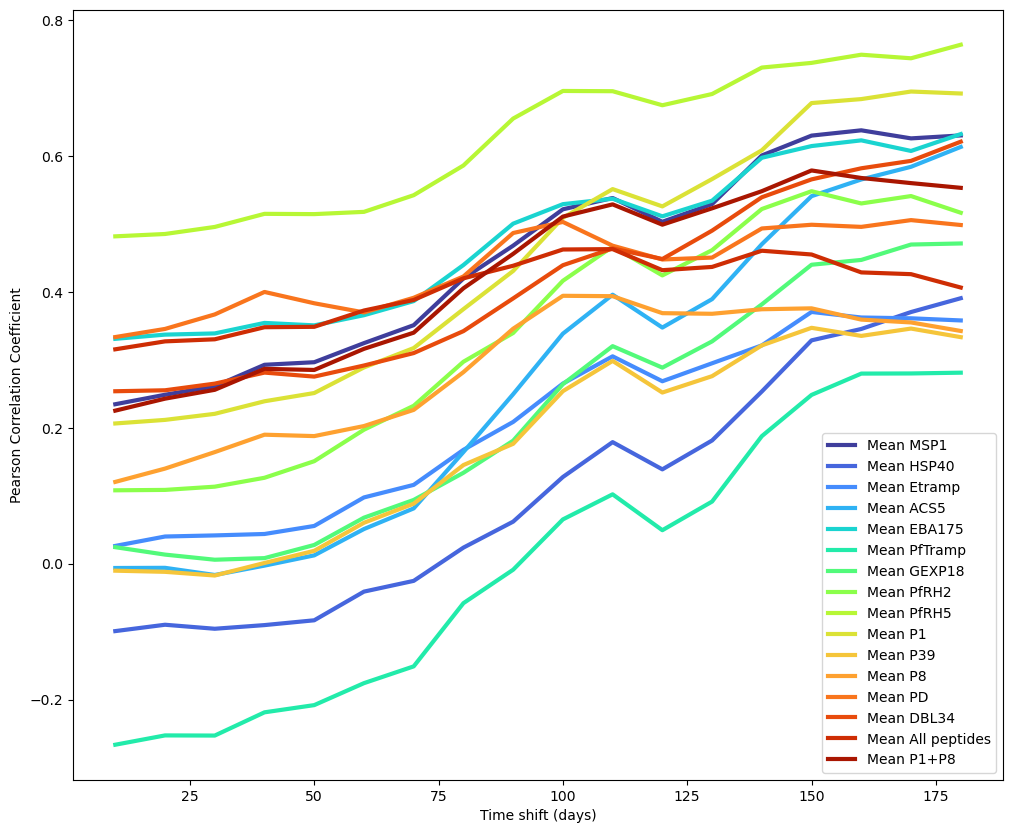

cases HIV+


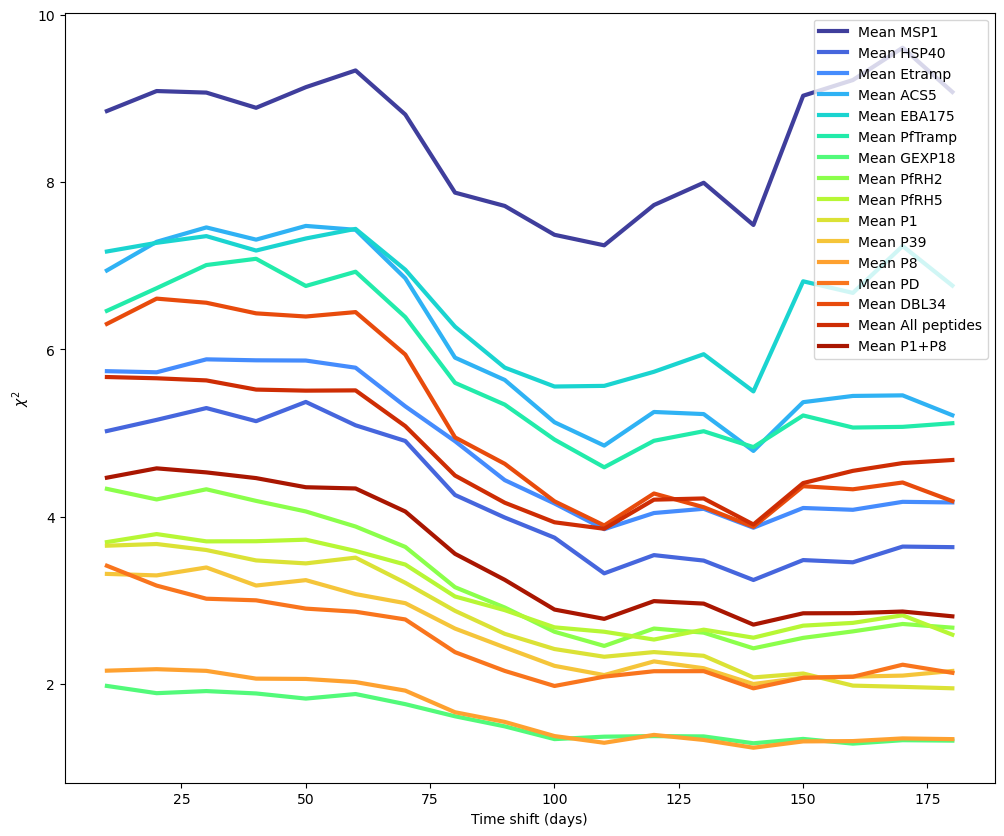

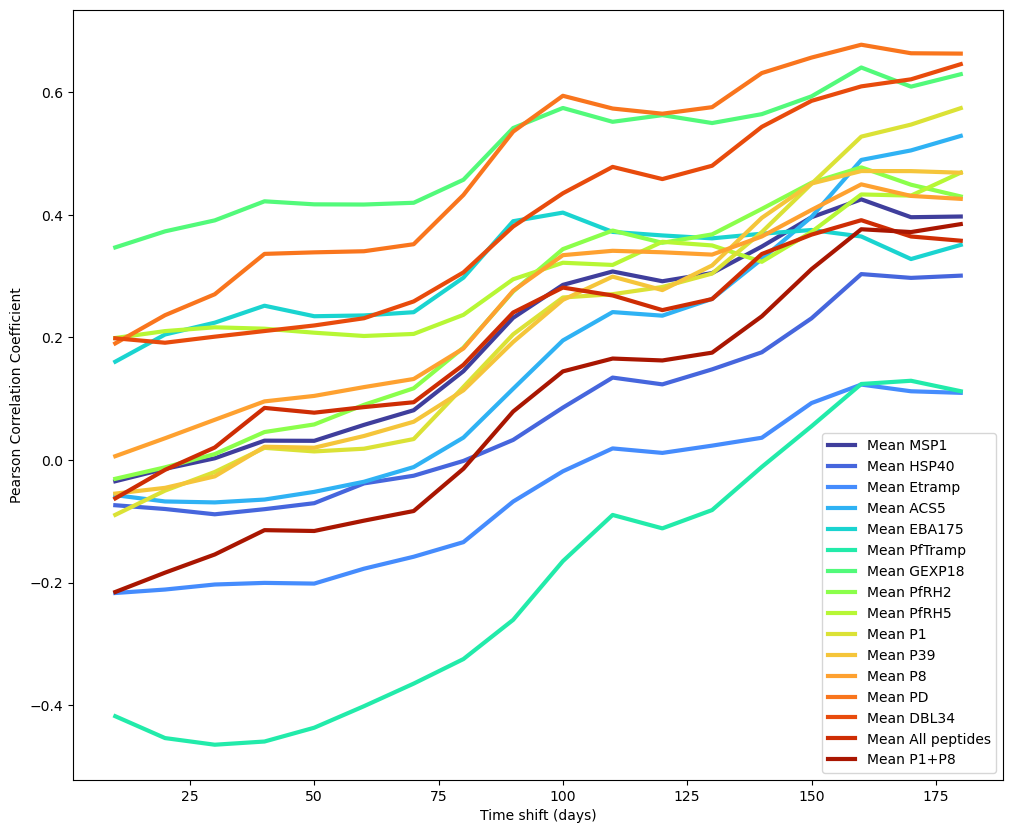

cases HIV-


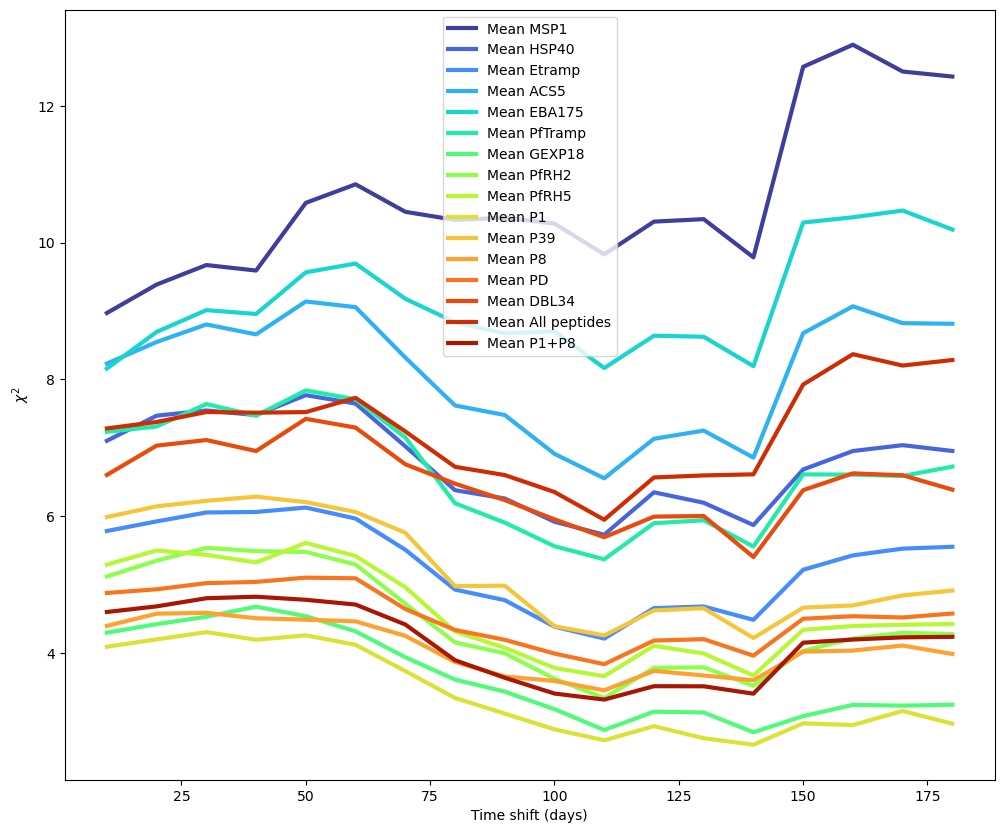

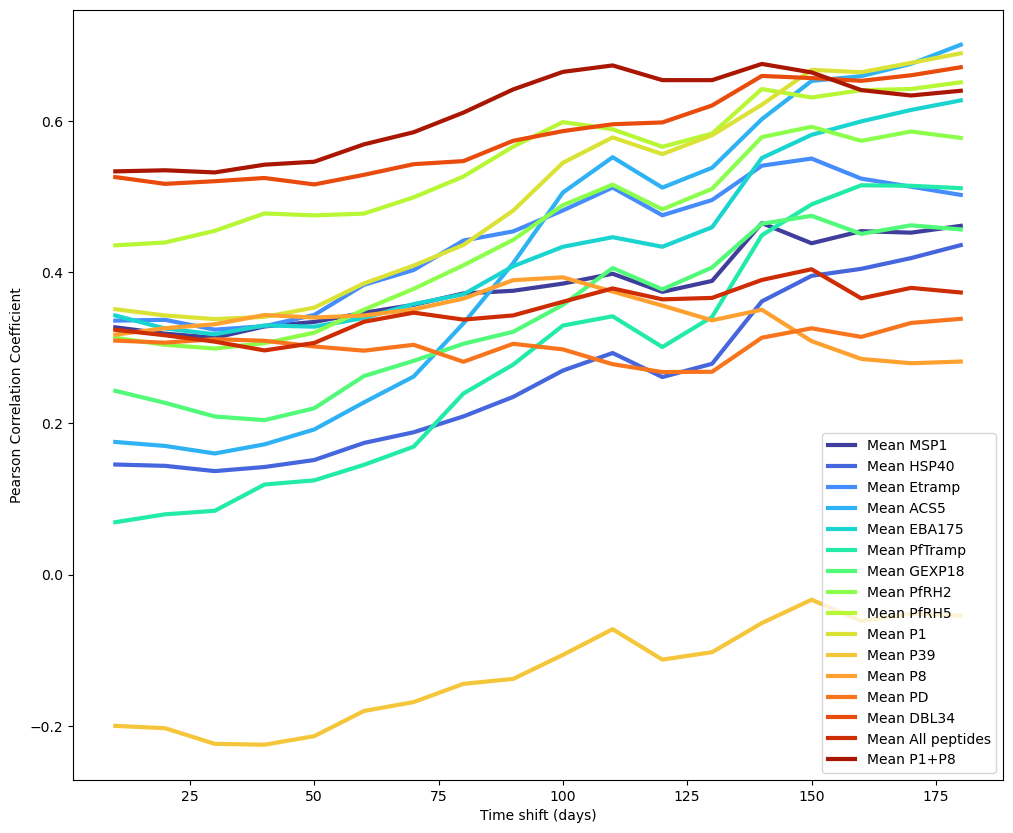

cases Primigravid HIV-


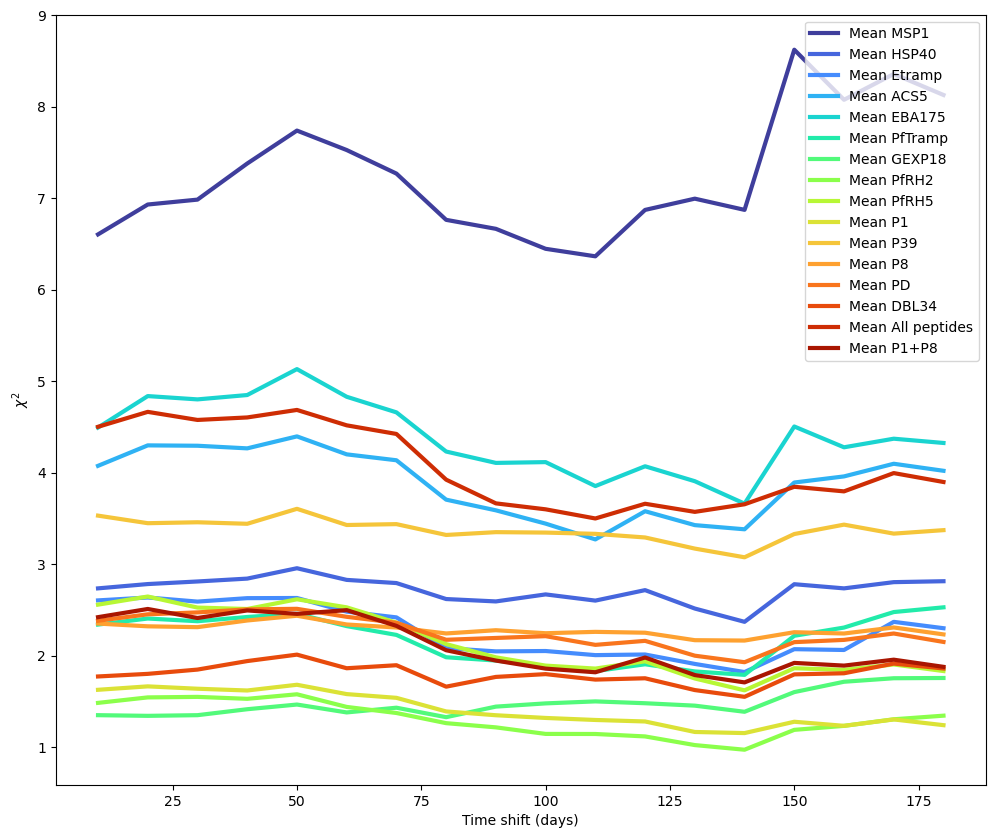

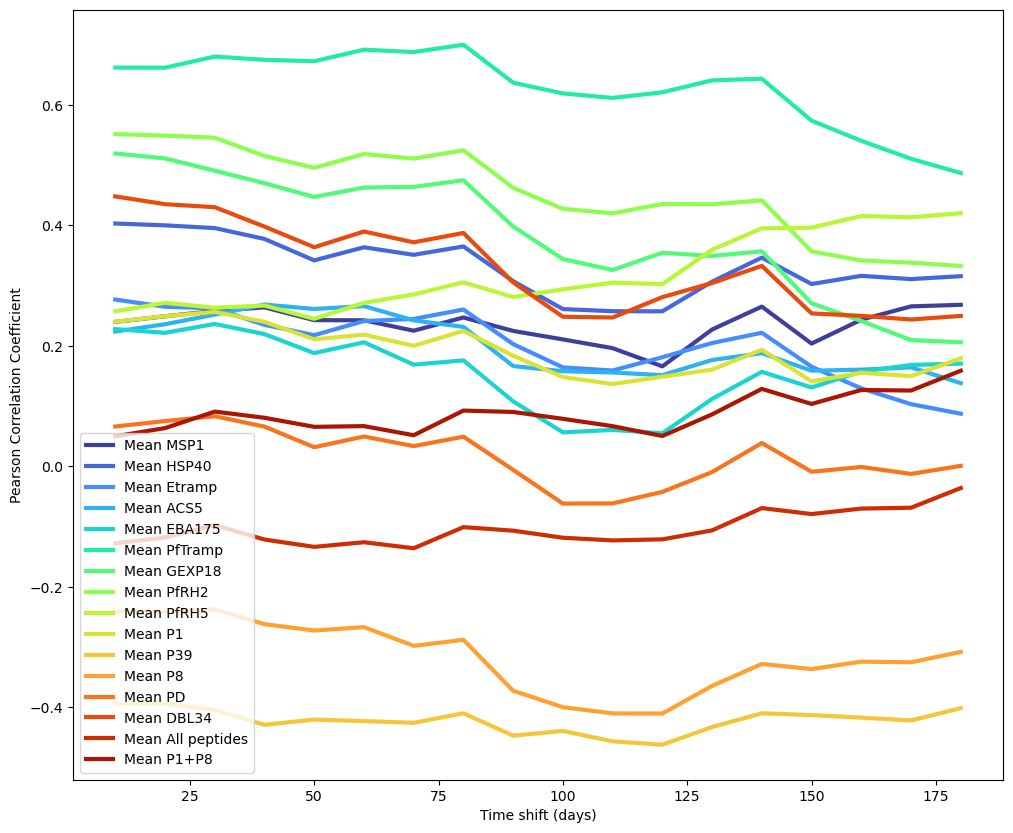

Time taken  3564.3712253570557  seconds ( 59 minutes)


In [8]:
mipmon_bins = 6
all_ts = range(0, 200, 10)
clinic_val = 'cases'
cutoff = 'FMM'

start = time()
min_chi2_ags_cc_vs_sero, max_pcorr_ags_cc_vs_sero, time_lag_chi2_ags_cc_vs_sero, time_lag_pcorr_ags_cc_vs_sero, \
chi2_mean_ags_cc_vs_sero, pcorr_mean_ags_cc_vs_sero, all_ts_ags_cc_vs_sero, \
pcorr_vs_t_cc_vs_sero, pcorr025_vs_t_cc_vs_sero, pcorr975_vs_t_cc_vs_sero = temporal_utils.chi2_vs_timeshift_vs_ags_vs_selection(mipmon, rrs, opd_5,  \
                                                                                    mipmon_selection, \
                                                                      all_ts, all_mipmon_areas, all_clinic_areas, \
                                                                      mipmon_bins, clinic_val, antigens, \
                                                                      show_all = False, show_all_means = False, \
                                                                      cutoff = cutoff, ymax_chi2 = None, \
                                                                                convolve_size = 1)

lstyles = ['-', ':', '-.']
colors = [cm.turbo((i+1)/float(len(antigens) + 1)) for i in range(len(antigens) + 1)]

end = time()
print('Time taken ', end-start,' seconds (', int((end-start)/60), 'minutes)')

In [9]:
def get_cc_vs_sero_df(max_pcorr, time_lag_pcorr, pcorr_vs_t, pcorr025_vs_t, pcorr975_vs_t):
    dataframe_pcr_ags = pd.DataFrame({})
    
    for s in mipmon_selection:
        dataframe_pcr_ags[s + ' PCC'] = pd.DataFrame(max_pcorr)[s]
        dataframe_pcr_ags[s + ' PCC time lag'] = pd.DataFrame(time_lag_pcorr)[s]
        dataframe_pcr_ags[s + ' PCC bot 95%CI'] = np.nan
        dataframe_pcr_ags[s + ' PCC top 95%CI'] = np.nan
        for a in max_pcorr[s]:
            w = np.where(pcorr_vs_t[s][a]['Mean'] == max_pcorr[s][a])[0]
            dataframe_pcr_ags[s + ' PCC bot 95%CI'][a] = pcorr025_vs_t[s][a]['Mean'][w][0]
            dataframe_pcr_ags[s + ' PCC top 95%CI'][a] = pcorr975_vs_t[s][a]['Mean'][w][0]
    
    return pd.DataFrame(dataframe_pcr_ags)

In [10]:
cc_vs_sero_df = get_cc_vs_sero_df(max_pcorr_ags_cc_vs_sero, time_lag_pcorr_ags_cc_vs_sero, \
                   pcorr_vs_t_cc_vs_sero, pcorr025_vs_t_cc_vs_sero, pcorr975_vs_t_cc_vs_sero)
cc_vs_sero_df

/tmp/ipykernel_213705/44184469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_pcr_ags[s + ' PCC bot 95%CI'][a] = pcorr025_vs_t[s][a]['Mean'][w][0]
/tmp/ipykernel_213705/44184469.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_pcr_ags[s + ' PCC top 95%CI'][a] = pcorr975_vs_t[s][a]['Mean'][w][0]
/tmp/ipykernel_213705/44184469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_pcr_ags[s + ' PCC b

All prenatal PCC  All prenatal PCC time lag  \
MSP1                  0.591397                        150   
HSP40                 0.452809                        180   
Etramp                0.507159                        150   
ACS5                  0.715935                        180   
EBA175                0.796232                        180   
PfTramp               0.436922                        170   
GEXP18                0.624946                        180   
PfRH2                 0.679798                        170   
PfRH5                 0.755109                        180   
P1                    0.780063                        180   
P39                   0.198192                        150   
P8                    0.407921                        100   
PD                    0.531695                        150   
DBL34                 0.713831                        180   
All peptides          0.562213                        150   
P1+P8                 0.689021                        180   

              All prenatal PCC bot 95%CI  All prenatal PCC top 95%CI  \
MSP1                            0.218819                    0.722595   
HSP40                           0.019581                    0.610570   
Etramp                         -0.001882                    0.663850   
ACS5                            0.393525                    0.794200   
EBA175                          0.301265                    0.815630   
PfTramp                         0.048951                    0.603966   
GEXP18                          0.124253                    0.766304   
PfRH2                           0.085022                    0.774556   
PfRH5                           0.166530                    0.820107   
P1                              0.148724                    0.830917   
P39                            -0.148478                    0.496058   
P8                             -0.139393                    0.584435   
PD                              0.043162                    0.688487   
DBL34                           0.426914                    0.784628   
All peptides                    0.024865                    0.641113   
P1+P8                           0.066077                    0.765109   

              Primigravid PCC  Primigravid PCC time lag  \
MSP1                 0.303743                        10   
HSP40                0.620586                        60   
Etramp               0.341366                       140   
ACS5                 0.457733                        60   
EBA175               0.309866                        10   
PfTramp              0.580713                       140   
GEXP18               0.694682                        10   
PfRH2                0.680649                       170   
PfRH5                0.460332                       180   
P1                   0.706021                       180   
P39                 -0.187364                       150   
P8                   0.015948                        20   
PD                   0.503547                       140   
DBL34                0.603360                       140   
All peptides         0.294051                       180   
P1+P8                0.532047                       180   

              Primigravid PCC bot 95%CI  Primigravid PCC top 95%CI  \
MSP1                          -0.114699                   0.492525   
HSP40                          0.085372                   0.749552   
Etramp                        -0.074326                   0.656569   
ACS5                          -0.143287                   0.638438   
EBA175                        -0.239338                   0.589100   
PfTramp                        0.007523                   0.748540   
GEXP18                         0.159892                   0.804719   
PfRH2                         -0.006235                   0.800599   
PfRH5                         -0.085483                   0.673570   
P1                             0.012394        